In [1]:
import cv2 as oc
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.995):
            print("\nReached 99.5% accuracy so cancelling training!")
            self.model.stop_training = True

In [3]:
classifier = tf.keras.models.Sequential()
classifier.add(tf.keras.layers.Conv2D(32, (3,3) , input_shape = (64,64,3), activation = "relu"))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
classifier.add(tf.keras.layers.Conv2D(32, (3,3) ,activation = "relu"))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))
classifier.add(tf.keras.layers.Flatten())
classifier.add(tf.keras.layers.Dense(units = 64, activation = "relu"))
classifier.add(tf.keras.layers.Dense(units = 4, activation = "softmax"))
classifier.compile(optimizer = "adam" , loss = "categorical_crossentropy", metrics = ["accuracy"])

classifier.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                401472    
_________________________________________

In [4]:
images = ImageDataGenerator(

rescale  = 1./255,
shear_range = 0.2,
zoom_range = 0.3,
horizontal_flip = True

)

In [5]:
train_data = images.flow_from_directory(
    
    "train",
    target_size = (64,64),
    batch_size = 32,
    class_mode = "categorical"
    
)

test_data = images.flow_from_directory(
    
    "test",
    target_size = (64,64),
    batch_size = 32,
    class_mode = "categorical"
    
)

Found 13376 images belonging to 4 classes.
Found 1594 images belonging to 4 classes.


In [6]:
callbacks = myCallback()

classifier.fit_generator(

train_data,
epochs = 10,
steps_per_epoch = 100,
validation_data = test_data,
validation_steps = 20,
callbacks = [callbacks]

)

Epoch 1/10
100/100 [==============================] - 7s 67ms/step - loss: 0.5091 - acc: 0.7875 - val_loss: 0.3324 - val_acc: 0.8875
Epoch 2/10
100/100 [==============================] - 6s 63ms/step - loss: 0.0732 - acc: 0.9781 - val_loss: 0.0306 - val_acc: 0.9922
Epoch 3/10
 20/100 [=====>........................] - ETA: 3s - loss: 0.0061 - acc: 1.0000
Reached 99.5% accuracy so cancelling training!
100/100 [==============================] - 6s 63ms/step - loss: 0.0147 - acc: 0.9972 - val_loss: 0.0061 - val_acc: 1.0000


/home/harsh/anaconda3/envs/RILintern/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in true_divide


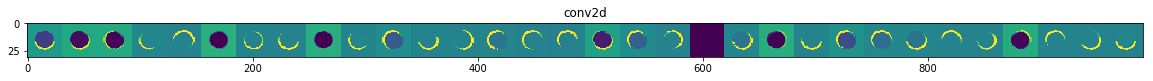

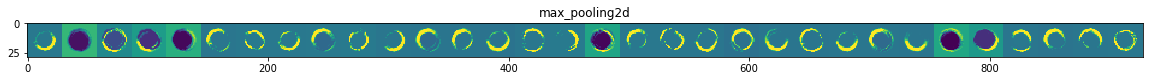

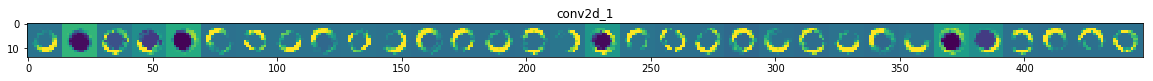

In [7]:
import numpy as np
import random
from   tensorflow.keras.preprocessing.image import img_to_array, load_img

successive_outputs = [layer.output for layer in classifier.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = classifier.input, outputs = successive_outputs)

img_path = "train/circle/0.png"
img = load_img(img_path, target_size=(64, 64))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in classifier.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

        #-----------------
        # Display the grid
        #-----------------

        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

/home/harsh/anaconda3/envs/RILintern/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


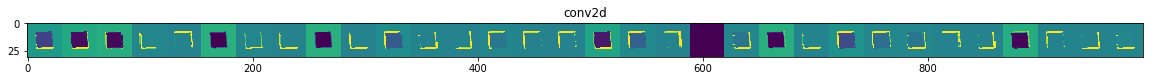

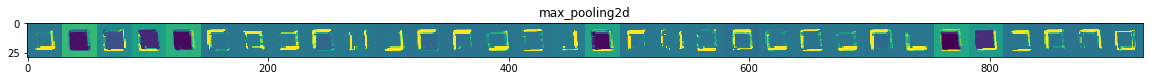

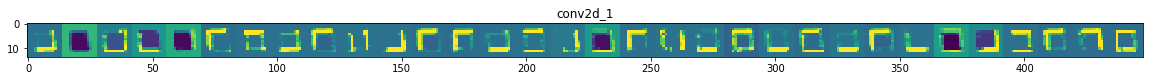

In [8]:
img_path = "train/square/0.png"
img = load_img(img_path, target_size=(64, 64))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in classifier.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

        #-----------------
        # Display the grid
        #-----------------

        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

/home/harsh/anaconda3/envs/RILintern/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


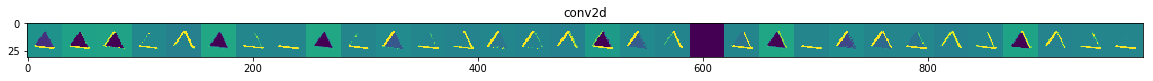

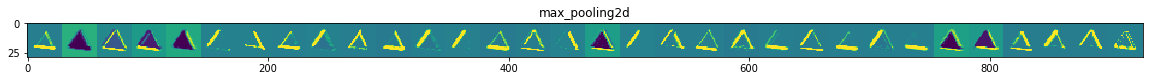

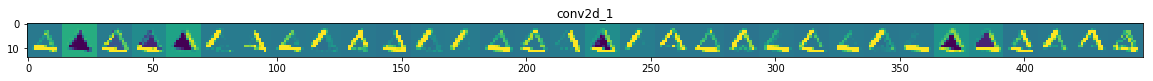

In [9]:
img_path = "train/triangle/0.png"
img = load_img(img_path, target_size=(64, 64))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in classifier.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

        #-----------------
        # Display the grid
        #-----------------

        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

/home/harsh/anaconda3/envs/RILintern/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in true_divide


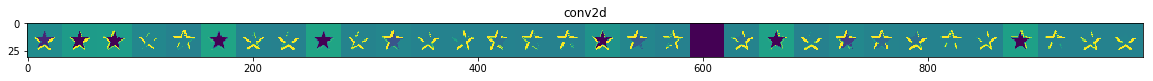

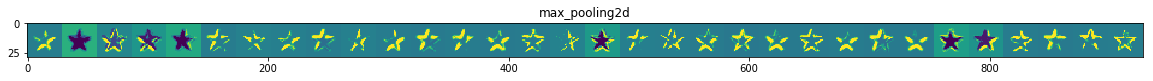

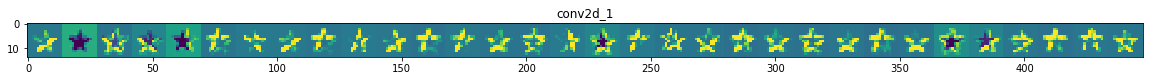

In [10]:
img_path = "train/star/0.png"
img = load_img(img_path, target_size=(64, 64))  # this is a PIL image

x   = img_to_array(img)                           # Numpy array with shape (150, 150, 3)
x   = x.reshape((1,) + x.shape)                   # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255.0

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in classifier.layers]

# -----------------------------------------------------------------------
# Now let's display our representations
# -----------------------------------------------------------------------
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]  # number of features in the feature map
        size       = feature_map.shape[ 1]  # feature map shape (1, size, size, n_features)
    
        # We will tile our images in this matrix
        display_grid = np.zeros((size, size * n_features))
    
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x  = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *=  64
            x += 128
            x  = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

        #-----------------
        # Display the grid
        #-----------------

        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid  ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' ) 

In [11]:
myimg = image.load_img("test/circleTest/3477.png",target_size=(64,64))
myimg = image.img_to_array(myimg)
myimg = np.expand_dims(myimg, axis = 0)

result = classifier.predict(myimg)
print(train_data.class_indices)
print(result)

{'circle': 0, 'square': 1, 'star': 2, 'triangle': 3}
[[1. 0. 0. 0.]]


In [12]:
myimg = image.load_img("test/squareTest/3508.png",target_size=(64,64))
myimg = image.img_to_array(myimg)
myimg = np.expand_dims(myimg, axis = 0)

result = classifier.predict(myimg)
print(train_data.class_indices)
print(result)

{'circle': 0, 'square': 1, 'star': 2, 'triangle': 3}
[[0. 1. 0. 0.]]


In [13]:
myimg = image.load_img("test/starTest/3596.png",target_size=(64,64))
myimg = image.img_to_array(myimg)
myimg = np.expand_dims(myimg, axis = 0)

result = classifier.predict(myimg)
print(train_data.class_indices)
print(result)

{'circle': 0, 'square': 1, 'star': 2, 'triangle': 3}
[[0. 0. 1. 0.]]


In [14]:
myimg = image.load_img("test/triangleTest/3688.png",target_size=(64,64))
myimg = image.img_to_array(myimg)
myimg = np.expand_dims(myimg, axis = 0)

result = classifier.predict(myimg)
print(train_data.class_indices)
print(result)

{'circle': 0, 'square': 1, 'star': 2, 'triangle': 3}
[[0. 0. 0. 1.]]
